In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# hide RuntimeWarning pandas
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
print("di")

## Laad data

In [2]:
## CBS summary data
cbs_sum_fp = "/Users/werk/Documents/git_hipnl/uu_link_dev/analyse_bestanden/n_pers_per_adres_en_stats_cats_2023_06_28_v2.xlsx"
cbs_sum = pd.read_excel(cbs_sum_fp)

# voeg year_mun_id toe
cbs_sum['year_mun_id'] = cbs_sum['year'].astype(str) + "_" + cbs_sum['municipality_cbs'].str.replace(" ", "_")

cbs_sum.fillna(0, inplace=True)

cbs_sum.head()

,year,cbs_year,amco,municipality_kohier,municipality_cbs,pct_records_included,n_all_records,n_records,n_adresses,n_adresses_surname,...,cat4,cat_sum,cat1_pct,cat2_pct,cat3_pct,cat4_pct,omvang_hh,hh_per_huis,inw_per_huis,year_mun_id
0,1889,1889,10327,Doesburg,Doesburg,0.976909,563,550,406,512,...,5,406,0.724,0.062,0.202,0.012,4.056147,1.222485,5.274556,1889_Doesburg
1,1879,1879,10327,Doesburg,Doesburg,0.996289,539,537,417,528,...,3,417,0.784,0.014,0.194,0.007,4.079380,1.141436,5.007735,1879_Doesburg
2,1881,1879,10909,Harlingen,Harlingen,0.972973,37,36,35,36,...,0,35,0.971,0.000,0.029,0.000,4.168417,1.223925,5.295106,1881_Harlingen
3,1889,1889,10909,Harlingen,Harlingen,0.982618,978,961,802,918,...,4,802,0.827,0.041,0.127,0.005,4.184792,0.000000,0.000000,1889_Harlingen
4,1899,1899,10007,Vaals,Vaals,0.986627,1346,1328,662,1264,...,39,662,0.601,0.030,0.310,0.059,4.192908,1.923602,8.673943,1899_Vaals


CBS DATA LARGE

In [218]:
## load cbs_sum_large, for determining refpop for municipalities without adress data
cbs_sum_large = pd.read_parquet("cbs_stats_summarized_all_municipalities_2023_07_06.parquet", engine="pyarrow")

# merge with cbs_sum
cbs_sum_large = pd.merge(cbs_sum_large, cbs_sum[['cbs_year','amco', 'cat1_pct', 'cat2_pct', 'cat3_pct', 'cat4_pct']], left_on=['amco', 'year'], right_on=['amco', 'cbs_year'], how='left')

# calculate refpop column
# berekenen proporties
cbs_sum_large['refpop'] = cbs_sum_large.cat1 * cbs_sum_large.cat1_pct + cbs_sum_large.cat2 * cbs_sum_large.cat2_pct + cbs_sum_large.cat3 * cbs_sum_large.cat3_pct
# make cbs_sum['refpop_prop'] integer
cbs_sum_large['refpop'] = cbs_sum_large['refpop'].astype(int)

cbs_sum_large.head()

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,verwant_huizing,cat1,cat2,cat3,cbs_year,cat1_pct,cat2_pct,cat3_pct,cat4_pct,refpop
0,1849,10534,'s-Graveland,143.0,1.0,0.0,270.0,1247.0,<NA>,144.0,...,<NA>,270.0,540.0,270.0,NaN,NaN,NaN,NaN,NaN,0
1,1849,10052,'s-Gravendeel,312.0,0.0,0.0,530.0,2368.0,<NA>,312.0,...,<NA>,530.0,1060.0,530.0,NaN,NaN,NaN,NaN,NaN,0
2,1849,11434,'s-Gravenhage,10346.0,92.0,0.0,16011.0,72225.0,<NA>,10438.0,...,<NA>,16011.0,32022.0,16011.0,NaN,NaN,NaN,NaN,NaN,0
3,1849,10469,'s-Gravenmoer,113.0,0.0,0.0,175.0,825.0,<NA>,113.0,...,<NA>,175.0,350.0,175.0,NaN,NaN,NaN,NaN,NaN,0
4,1849,11059,'s-Gravenpolder,109.0,0.0,0.0,139.0,667.0,<NA>,109.0,...,<NA>,139.0,278.0,139.0,NaN,NaN,NaN,NaN,NaN,0


HDNG

In [184]:
hdng = pd.read_parquet("HDNG_v4_1849_1925.parquet", engine="pyarrow")
hdng.head()

,amco,name,variable,description,information,sex,year,visualisation_year,value,sources,remark_1,remark_2,remark_3,remark_4
14360,10002,ZUIDLAREN,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14361,10004,ZIJPE,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14362,10005,OPSTERLAND,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14363,10006,BAARDWIJK,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14364,10007,VAALS,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>


TAX DATA

In [ ]:
tax_records_fp = "/Users/werk/Documents/git_hipnl/data/tax_records/tax_records_latest.parquet"
tax_records = pd.read_parquet(tax_records_fp, engine='pyarrow')
# add record_id, for easy reference. This is actually the order of the records in the parquet file
tax_records['tax_record_id'] = range(tax_records.shape[0])

tax_records.head()

,page_nr,place,volgnummer,wijk,house_nr_wijk,street,house_nr_street,title,firstnames,initials,...,marital_status,tax_raad2,deducations,income,month,notes_cleaning,cbs_year,cbscode,year_mun_id,tax_record_id
0,1,Eindhoven,1,<NA>,<NA>,Kerkstraat,9,Wed,<NA>,H.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,0
1,1,Eindhoven,2,<NA>,<NA>,Vrijstraat,47,<NA>,<NA>,A.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,1
2,1,Eindhoven,3,<NA>,<NA>,Vrijstraat,1,<NA>,Cath.,C.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,2
3,1,Eindhoven,4,<NA>,<NA>,Markt,14,<NA>,<NA>,H.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,3
4,1,Eindhoven,5,<NA>,<NA>,Prins Hendrikstraat,7a,<NA>,<NA>,J.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,4


In [ ]:
tax_schedule_fp = "/Users/werk/Documents/git_hipnl/data/tax_records/tax_schedule_latest.parquet"
tax_schedule = pd.read_parquet(tax_schedule_fp, engine='pyarrow')
tax_schedule.head()

,class_nr,min,max,verhoudingscijfer,tax,grondslag voor berekening van de aanslag,year,file_name,place,municipality,...,has_duplicate,file_id,sheet_name,pct,pct1,tax1,pct2,tax2,income_gross,income_taxable
0,1,300,400,0.125,<NA>,50.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2,401,500,0.125,<NA>,62.5,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,501,600,0.125,<NA>,75.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,4,601,700,0.150,<NA>,105.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,5,701,800,0.150,<NA>,120.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
# add year_mun_id to tax_schedule
file_id_year_mun_id_mapping = tax_records[['file_id', 'year_mun_id']].drop_duplicates().set_index('file_id').to_dict()['year_mun_id']
tax_schedule['year_mun_id'] = tax_schedule.file_id.map(file_id_year_mun_id_mapping)

In [ ]:
tax_records.year_mun_id.unique().shape[0]

152

## Bewerk en filter data

#### Berwerk cbs

In [ ]:
# refpop_cat1 = CBS_munics$huisgezinnen + CBS_munics$afzonderlijk_levenden
cbs_sum['cat1'] = cbs_sum['huisgezinnen'] + cbs_sum['afzonderlijk_levenden']

# refpop_cat2 = CBS_munics$afzonderlijk_levenden + (CBS_munics$huisgezinnen*2) + CBS_munics$overige_leden_huisgezin
cbs_sum['cat2'] = cbs_sum['afzonderlijk_levenden'] + (cbs_sum['huisgezinnen']*2) + cbs_sum['overige_leden_huisgezin']

# refpop_cat3 = CBS_munics$afzonderlijk_levenden + CBS_munics$huisgezinnen + CBS_munics$overige_leden_huisgezin
cbs_sum['cat3'] = cbs_sum['afzonderlijk_levenden'] + cbs_sum['huisgezinnen'] + cbs_sum['overige_leden_huisgezin'] + cbs_sum['niet_verwant_huizing']

# berekenen proporties
cbs_sum['refpop_prop'] = cbs_sum.cat1 * cbs_sum.cat1_pct + cbs_sum.cat2 * cbs_sum.cat2_pct + cbs_sum.cat3 * cbs_sum.cat3_pct
# make cbs_sum['refpop_prop'] integer
cbs_sum['refpop_prop'] = cbs_sum['refpop_prop'].astype(int)


# filte cbs_sum where no refpop is present
cbs_sum_ref = cbs_sum[cbs_sum.refpop_prop > 0]
cbs_sum_ref.head()

,year,cbs_year,amco,municipality_kohier,municipality_cbs,pct_records_included,n_all_records,n_records,n_adresses,n_adresses_surname,...,cat_sum,cat1_pct,cat2_pct,cat3_pct,cat4_pct,omvang_hh,hh_per_huis,inw_per_huis,year_mun_id,refpop_prop
0,1889,1889,10327,Doesburg,Doesburg,0.976909,563,550,406,512,...,406,0.724,0.062,0.202,0.012,4.056147,1.222485,5.274556,1889_Doesburg,1352
1,1879,1879,10327,Doesburg,Doesburg,0.996289,539,537,417,528,...,417,0.784,0.014,0.194,0.007,4.079380,1.141436,5.007735,1879_Doesburg,1255
2,1881,1879,10909,Harlingen,Harlingen,0.972973,37,36,35,36,...,35,0.971,0.000,0.029,0.000,4.168417,1.223925,5.295106,1881_Harlingen,2543
3,1889,1889,10909,Harlingen,Harlingen,0.982618,978,961,802,918,...,802,0.827,0.041,0.127,0.005,4.184792,0.000000,0.000000,1889_Harlingen,2817
4,1899,1899,10007,Vaals,Vaals,0.986627,1346,1328,662,1264,...,662,0.601,0.030,0.310,0.059,4.192908,1.923602,8.673943,1899_Vaals,1771


Filter cbs_sum_large -> keep year mun from tax records

In [ ]:
##  filter cbs_sum_large; keep amco-year combiniations that are in tax_records
# create amco_year column
tax_records['amco_year'] = tax_records.amco.astype(str) + "_" + tax_records.cbs_year.astype(str)
cbs_sum_large['amco_year'] = cbs_sum_large.amco.astype(str) + "_" + cbs_sum_large.year.astype(str)

# Add year_mun_id to cbs_sum_large
# create mapping
acmo_year_mun_id_mapping = tax_records[['amco_year', 'year_mun_id']].drop_duplicates().set_index('amco_year').to_dict()['year_mun_id']
# map to cbs_large
cbs_sum_large['year_mun_id'] = cbs_sum_large.amco_year.map(acmo_year_mun_id_mapping)


# Add year_mun_id where it is missing (i.e. not in tax_records)
cbs_sum_large.loc[cbs_sum_large.year_mun_id.isna(), 'year_mun_id'] = cbs_sum_large['year'].astype(str) + "_" + cbs_sum_large['municipality'].str.replace(" ", "_")


# # filter cbs_sum_large
# cbs_sum_large_filt = cbs_sum_large.query("amco_year.isin(@tax_records.amco_year)").copy()

# # inspect missing
# missing_amco_year = [i for i in tax_records.amco_year.unique().tolist() if i not in cbs_sum_large_filt.amco_year.tolist()]
# tax_records.query("amco_year.isin(@missing_amco_year)").year_mun_id.unique()


# add hdng data
# 'Gehuwden'
# 'Bevolking'


In [ ]:
# Make long format from cbs_sum_large_filt
# cbs_large_long_prep = cbs_sum_large_filt.copy()
cbs_large_long_prep = cbs_sum_large.copy()


# rename refpop column
cbs_large_long_prep.rename(columns={"refpop" : "refpop_catprop"}, inplace=True)
# replace 0 in refpop_catprop with nan
cbs_large_long_prep.loc[cbs_large_long_prep.refpop_catprop == 0, 'refpop_catprop'] = np.nan

# add refpop_brp column with beroepsbevolking
cbs_large_long_prep["refpop_brp"] = cbs_large_long_prep.beroepsbevolking
# replace 0 with nan
cbs_large_long_prep.loc[cbs_large_long_prep.refpop_brp == 0, 'refpop_brp'] = np.nan

# add refpop_hh column with cat1
cbs_large_long_prep["refpop_hh"] = cbs_large_long_prep.cat1
# replace 0 with nan
cbs_large_long_prep.loc[cbs_large_long_prep.refpop_hh == 0, 'refpop_hh'] = np.nan



# add hdng male population to cbs_large_long_prep
hdng_male_pop = hdng.query("description == 'Bevolking' & information == 'totaal' & sex == 'M' & visualisation_year.isin(@cbs_sum_large.year.unique())").copy()
# check if visualisation_year is always equal to year, otherwise join on visualisation year, or fix it
assert hdng_male_pop.query("year != visualisation_year").year.unique().shape[0] == 0, "Visualisation year is always not equal to year!"

# add mannelijke bevolking to cbs_sum_large (rename 'value' column to 'bevolking_mannelijk')
cbs_large_long_prep = pd.merge(cbs_large_long_prep, hdng_male_pop[['amco', 'year', 'value']].rename(columns={"value" : "bevolking_mannelijk"}), on=['amco', 'year'], how='left')

In [ ]:
cbs_large_long_prep

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,cat1_pct,cat2_pct,cat3_pct,cat4_pct,refpop_catprop,amco_year,year_mun_id,refpop_brp,refpop_hh,bevolking_mannelijk
0,1849,10534,'s-Graveland,143.0,1.0,0.0,270.0,1247.0,<NA>,144.0,...,NaN,NaN,NaN,NaN,NaN,10534_1849,1849_'s-Graveland,<NA>,270.0,560.0
1,1849,10052,'s-Gravendeel,312.0,0.0,0.0,530.0,2368.0,<NA>,312.0,...,NaN,NaN,NaN,NaN,NaN,10052_1849,1849_'s-Gravendeel,<NA>,530.0,1147.0
2,1849,11434,'s-Gravenhage,10346.0,92.0,0.0,16011.0,72225.0,<NA>,10438.0,...,NaN,NaN,NaN,NaN,NaN,11434_1849,1849_'s-Gravenhage,<NA>,16011.0,32890.0
3,1849,10469,'s-Gravenmoer,113.0,0.0,0.0,175.0,825.0,<NA>,113.0,...,NaN,NaN,NaN,NaN,NaN,10469_1849,1849_'s-Gravenmoer,<NA>,175.0,400.0
4,1849,11059,'s-Gravenpolder,109.0,0.0,0.0,139.0,667.0,<NA>,109.0,...,NaN,NaN,NaN,NaN,NaN,11059_1849,1849_'s-Gravenpolder,<NA>,139.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9351,1920,10093,Zwolle,7132.0,205.0,765.0,7740.0,35743.0,<NA>,7337.0,...,NaN,NaN,NaN,NaN,NaN,10093_1920,1920_Zwolle,<NA>,8505.0,17470.0
9352,1920,10654,Zwollerkerspel,1434.0,1.0,0.0,<NA>,7231.0,<NA>,1435.0,...,NaN,NaN,NaN,NaN,NaN,10654_1920,1920_Zwollerkerspel,<NA>,<NA>,3803.0
9353,1920,10116,de Werken en Sleeuwijk,715.0,10.0,0.0,<NA>,3417.0,<NA>,725.0,...,NaN,NaN,NaN,NaN,NaN,10116_1920,1920_de_Werken_en_Sleeuwijk,<NA>,<NA>,1772.0
9354,1920,10128,het Bildt,2224.0,19.0,0.0,<NA>,8455.0,<NA>,2243.0,...,NaN,NaN,NaN,NaN,NaN,10128_1920,1920_het_Bildt,<NA>,<NA>,4250.0


In [ ]:
# make long format with year_mun_id as index, and the refpop columns as values
# cbs_large_long = cbs_large_long_prep.set_index(['year_mun_id'])[['refpop_catprop', 'refpop_brp', 'refpop_hh']].stack().reset_index().rename(columns={'level_1' : 'refpop_source', 0 : 'refpop'})
cbs_large_long = cbs_large_long_prep.set_index(['year_mun_id','year', 'bevolking', 'bewoonde_huizen_schepen', 'bevolking_mannelijk'])[['refpop_catprop', 'refpop_brp', 'refpop_hh']].stack().reset_index().rename(columns={0 : 'refpop'})

# rename level column to refpop_source
cbs_large_long = cbs_large_long.rename(columns={[i for i in cbs_large_long.columns if i.startswith('level')][0] : 'refpop_source'})

# make refpop integer
cbs_large_long.refpop = cbs_large_long.refpop.astype(int)

cbs_large_long

,year_mun_id,year,bevolking,bewoonde_huizen_schepen,bevolking_mannelijk,refpop_source,refpop
0,1849_'s-Graveland,1849,1247.0,144.0,560.0,refpop_hh,270
1,1849_'s-Gravendeel,1849,2368.0,312.0,1147.0,refpop_hh,530
2,1849_'s-Gravenhage,1849,72225.0,10438.0,32890.0,refpop_hh,16011
3,1849_'s-Gravenmoer,1849,825.0,113.0,400.0,refpop_hh,175
4,1849_'s-Gravenpolder,1849,667.0,109.0,335.0,refpop_hh,139
...,...,...,...,...,...,...,...
8683,1920_Vlaardingen,1920,25447.0,4232.0,12702.0,refpop_hh,5452
8684,1920_Vlissingen,1920,22511.0,3556.0,11200.0,refpop_hh,5461
8685,1920_Zaandam,1920,28828.0,6986.0,0.0,refpop_hh,7085
8686,1920_Zaandam,1920,28828.0,6986.0,14517.0,refpop_hh,7085


## Check statistieken

In [ ]:
cbs_large_long['refpop_pct_bevolking'] = cbs_large_long.refpop / cbs_large_long.bevolking

cbs_large_long['refpop_pct_woningen'] = cbs_large_long.refpop / cbs_large_long.bewoonde_huizen_schepen

cbs_large_long['refpop_pct_bevolking_mannelijk'] = cbs_large_long.refpop / cbs_large_long.bevolking_mannelijk

[]

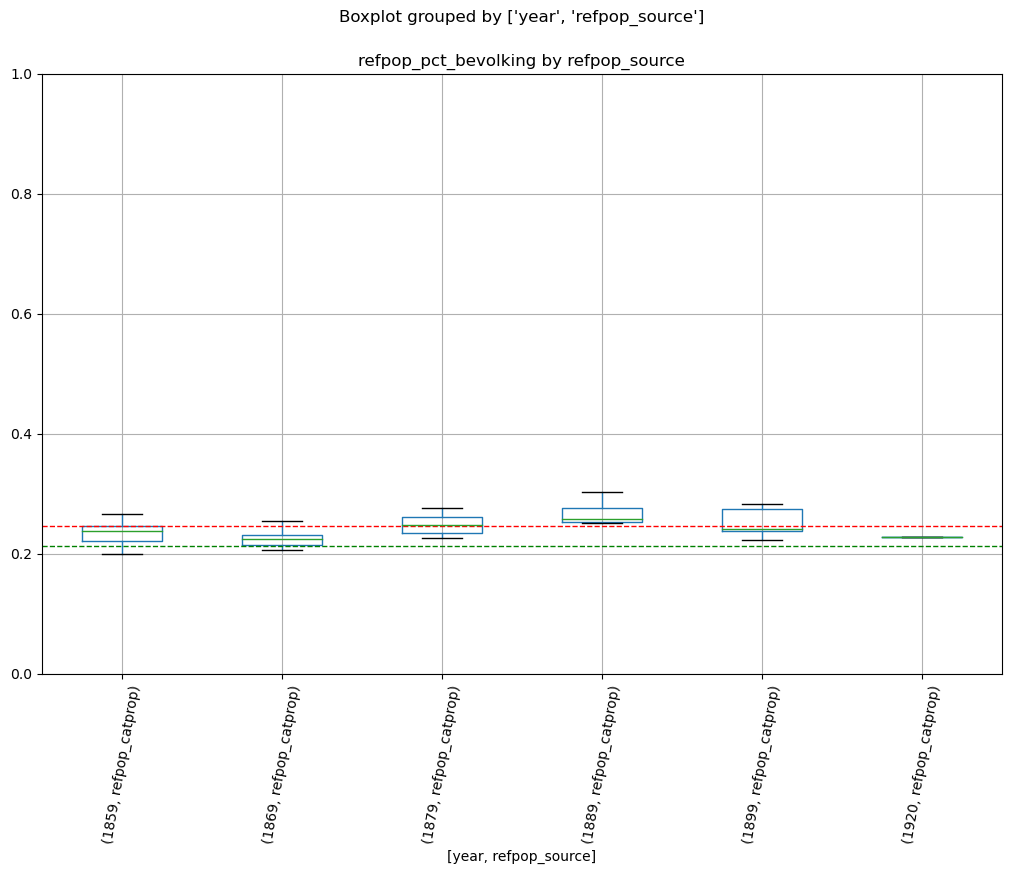

In [357]:
plot_df = cbs_large_long
plot_df = cbs_large_long.query("refpop_source == 'refpop_catprop'").copy()

mean_refpop_pct_bevolking_catprop =  cbs_large_long.query('refpop_source == "refpop_catprop"').refpop_pct_bevolking.mean()
mean_refpop_pct_bevolking_hh =  cbs_large_long.query('refpop_source == "refpop_hh"').refpop_pct_bevolking.mean()

# plot refpop_pct_bevolking by refpop_source
fig = plot_df.boxplot(column='refpop_pct_bevolking', by=['year', 'refpop_source'], figsize=(12,8), rot=80)
# set title
fig.title.set(text="refpop_pct_bevolking by refpop_source")
# set y limit to 0,1
plt.ylim(0,1)
# add horizontal line at mean_refpop_pct_bevolking_catprop
plt.axhline(mean_refpop_pct_bevolking_catprop, color='red', linestyle='dashed', linewidth=1)
# add horzontal line at mean_refpop_pct_bevolking_hh
plt.axhline(mean_refpop_pct_bevolking_hh, color='green', linestyle='dashed', linewidth=1)

fig.plot()

In [353]:
plot_df

,year_mun_id,year,bevolking,bewoonde_huizen_schepen,bevolking_mannelijk,refpop_source,refpop,refpop_pct_bevolking,refpop_pct_woningen,refpop_pct_bevolking_mannelijk
0,1849_'s-Graveland,1849,1247.0,144.0,560.0,refpop_hh,270,0.216520,1.875000,0.482143
1,1849_'s-Gravendeel,1849,2368.0,312.0,1147.0,refpop_hh,530,0.223818,1.698718,0.462075
2,1849_'s-Gravenhage,1849,72225.0,10438.0,32890.0,refpop_hh,16011,0.221682,1.533915,0.486804
3,1849_'s-Gravenmoer,1849,825.0,113.0,400.0,refpop_hh,175,0.212121,1.548673,0.437500
4,1849_'s-Gravenpolder,1849,667.0,109.0,335.0,refpop_hh,139,0.208396,1.275229,0.414925
...,...,...,...,...,...,...,...,...,...,...
8682,1920_Venlo,1920,20841.0,3335.0,10119.0,refpop_hh,4471,0.214529,1.340630,0.441842
8683,1920_Vlaardingen,1920,25447.0,4232.0,12702.0,refpop_hh,5452,0.214249,1.288280,0.429224
8684,1920_Vlissingen,1920,22511.0,3556.0,11200.0,refpop_hh,5461,0.242593,1.535714,0.487589
8686,1920_Zaandam,1920,28828.0,6986.0,14517.0,refpop_hh,7085,0.245768,1.014171,0.488048


<Axes: xlabel='bevolking_mannelijk', ylabel='refpop'>

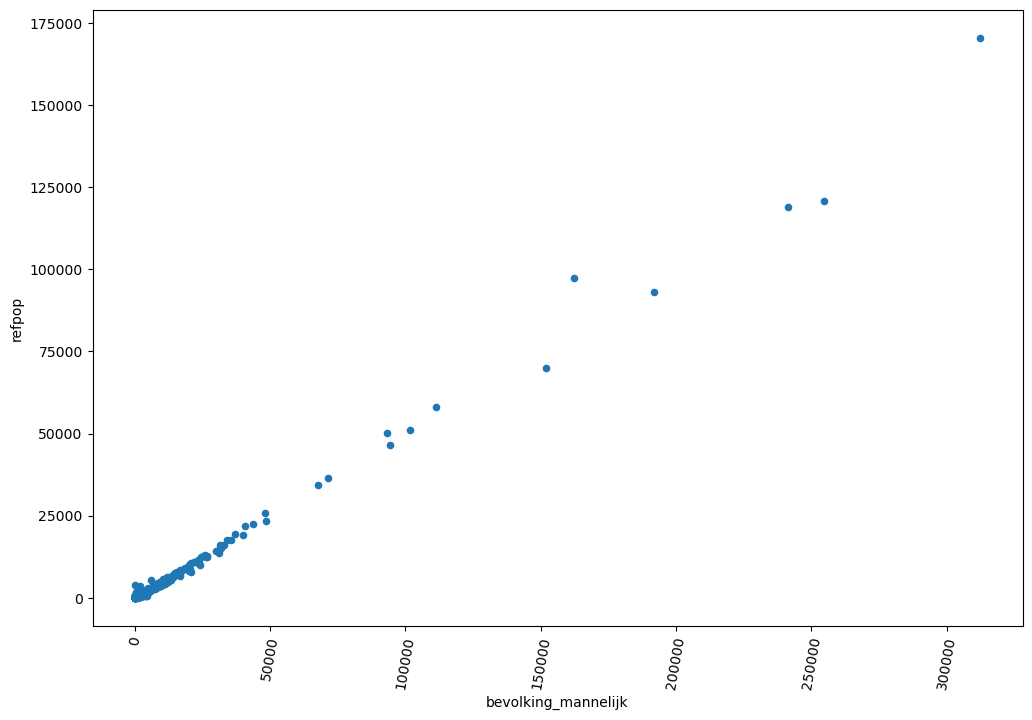

In [352]:
plot_df.plot(x='bevolking_mannelijk', y='refpop', kind='scatter', figsize=(12,8), rot=80)

In [322]:
plot_df[['bevolking_mannelijk', 'refpop']].corr()

,bevolking_mannelijk,refpop
bevolking_mannelijk,1.000000,0.994515
refpop,0.994515,1.000000


In [323]:
plot_df[['bevolking_mannelijk', 'bevolking', 'refpop']].corr()['refpop']

bevolking_mannelijk    0.994515
bevolking              0.997511
refpop                 1.000000
Name: refpop, dtype: float64

In [264]:
plot_df['refpop'] = plot_df['refpop'].astype(int)

In [325]:
plot_df['bevolking_mannelijk']

1274      789.0
1439      763.0
1466      373.0
1659     4701.0
1758     1017.0
2295      591.0
2600       <NA>
2638       <NA>
2838       <NA>
2995       <NA>
3421       <NA>
3762       <NA>
3823       <NA>
3961       <NA>
4538       <NA>
4842     1298.0
4922      731.0
4998     2141.0
5172     4846.0
5184     1490.0
6108      737.0
6110        0.0
6112      764.0
6210     1242.0
6297      650.0
6372     2093.0
7224     1423.0
7271     3224.0
7298      584.0
7366     4515.0
8658    23964.0
Name: bevolking_mannelijk, dtype: double[pyarrow]

In [ ]:
# create linear model, predicting refpop from bevolking_mannelijk and year (as a categorical)
import statsmodels.formula.api as smf
import statsmodels.api as sm


plot_df = cbs_large_long
# plot_df = cbs_large_long.query("refpop_source == 'refpop_catprop'").copy()
plot_df = cbs_large_long.query("refpop_source == 'refpop_hh'").copy()
# plot_df_mannelijk = plot_df.query("bevolking_mannelijk > 50 & bevolking_mannelijk < 20000")
# plot_df = plot_df.query("bevolking > 50 & bevolking < 20000")



# plot_df['bewoonde_huizen_schepen'] = plot_df['bewoonde_huizen_schepen'].astype(float)
plot_df['bevolking_mannelijk'] = plot_df['bevolking_mannelijk'].astype(float)
plot_df['bevolking'] = plot_df['bevolking'].astype(float)

plot_df['year'] = plot_df['year'].astype(int)


# index of outliers
leave_out = [1625, 5287]
leav_out = []
# plot_df = plot_df.loc[~plot_df.index.isin(leave_out)]


# model = smf.ols(formula='refpop ~ bevolking_mannelijk', data=plot_df)
# model = smf.ols(formula='refpop ~ bevolking', data=plot_df)

# create model with log transformed refpop
model = smf.ols(formula='np.log(refpop) ~ np.log(bevolking)', data=plot_df.loc[~plot_df.index.isin(leave_out)])
# model = smf.ols(formula='np.log(refpop) ~ np.log(bevolking) + C(year)', data=plot_df)


# create model with log transformed refpop
# model = smf.ols(formula='np.log(refpop) ~ np.log(bevolking_mannelijk)', data=plot_df_mannelijk)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(refpop)   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.408e+05
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:01:58   Log-Likelihood:                 6530.0
No. Observations:                6820   AIC:                        -1.306e+04
Df Residuals:                    6818   BIC:                        -1.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6585      0.00

/var/folders/rb/qqpn60cd2g1g561m_1tcrzvr0000gq/T/ipykernel_14421/3422672220.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


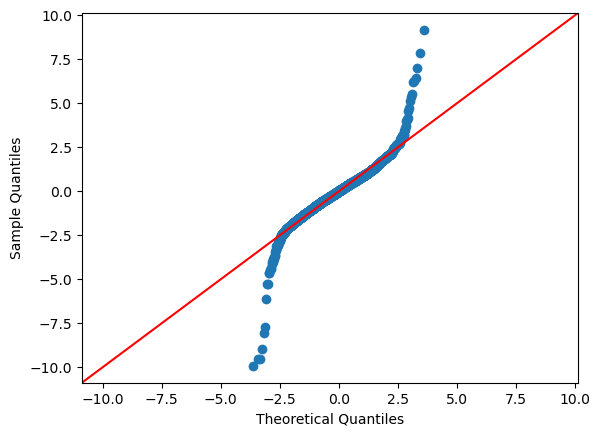

In [445]:
# plot residuals
fig = sm.qqplot(results.resid, line='45', fit=True)
fig.show()

/var/folders/rb/qqpn60cd2g1g561m_1tcrzvr0000gq/T/ipykernel_14421/3210104952.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


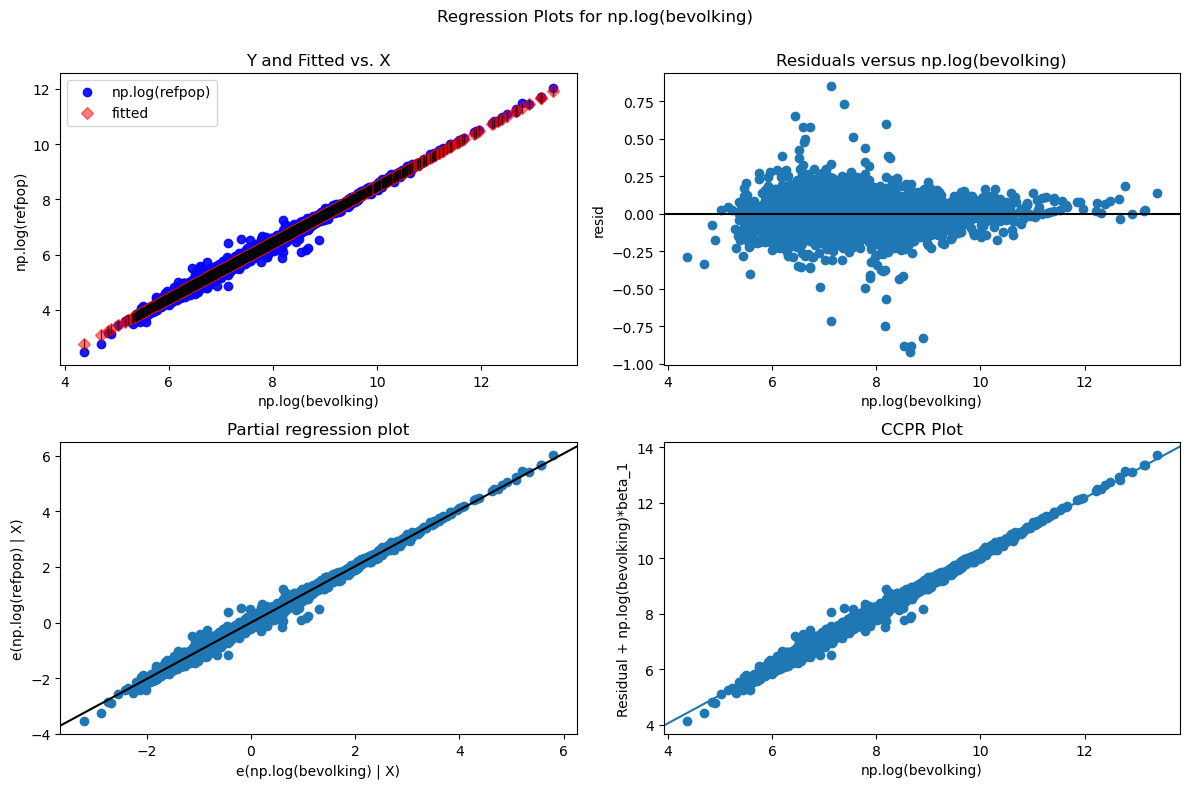

In [447]:
# inspect results with plots
fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(results, "bevolking_mannelijk", fig=fig)
# fig = sm.graphics.plot_regress_exog(results, "bevolking", fig=fig)
fig = sm.graphics.plot_regress_exog(results, "np.log(bevolking)", fig=fig)

# fig = sm.graphics.plot_regress_exog(results, "year", fig=fig)


fig.show()

In [475]:
# get df with residuals
residuals_df = pd.DataFrame({'residuals' : results.resid, 'fitted' : results.fittedvalues, 'refpop' : plot_df.refpop, 'bevolking' : plot_df.bevolking, 'bevolking_mannelijk' : plot_df.bevolking_mannelijk, 'year' : plot_df.year})

residuals_df['fitted_exp'] = np.exp(residuals_df.fitted)
residuals_df.head()

,residuals,fitted,refpop,bevolking,bevolking_mannelijk,year,fitted_exp
0,0.029027,5.569395,270,1247.0,560.0,1849,262.275299
1,0.053238,6.219639,530,2368.0,1147.0,1849,502.521627
2,-0.003987,9.685018,16011,72225.0,32890.0,1849,16074.956371
3,0.014262,5.150524,175,825.0,400.0,1849,172.521856
4,-0.000493,4.934967,139,667.0,335.0,1849,139.068599


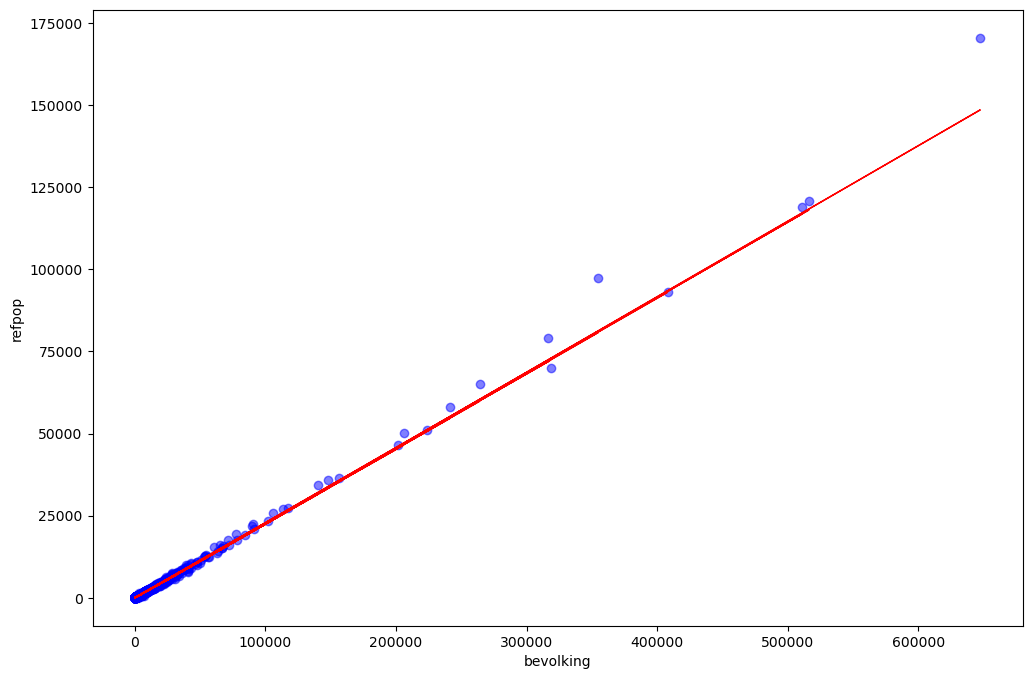

In [476]:
# plot refpop values, and fitted_exp values (as a line)
plt.figure(figsize=(12,8))
plt.scatter(residuals_df.bevolking, residuals_df.refpop, color='blue', alpha=0.5)
plt.plot(residuals_df.bevolking, residuals_df.fitted_exp, color='red', linewidth=1)
plt.xlabel('bevolking')
plt.ylabel('refpop')
plt.show()

In [486]:
residuals_df['verschil'] = (residuals_df.refpop - residuals_df.fitted_exp).abs()
residuals_df['verschil_pct'] = residuals_df.verschil / residuals_df.fitted_exp

In [478]:
residuals_df.sort_values('verschil', ascending=False).head(20)

,residuals,fitted,refpop,bevolking,bevolking_mannelijk,year,fitted_exp,verschil
8649,0.137923,11.908808,170541,647427.0,312389.0,1920,148569.496603,21971.503397
8643,0.185502,11.299507,97247,354987.0,162482.0,1920,80781.816089,16465.183911
3648,0.095900,11.183617,79183,316646.0,NaN,1879,71942.127650,7240.872350
2522,0.082750,10.999654,65017,264106.0,NaN,1869,59853.456315,5163.543685
1316,0.062321,10.908288,58140,241348.0,111310.0,1859,54627.231194,3512.768806
6087,0.072733,10.747825,50039,206022.0,93092.0,1899,46528.717247,3510.282753
8677,0.023416,11.679279,120897,516271.0,254763.0,1920,118099.001427,2797.998573
4397,0.078783,10.411491,35964,147861.0,NaN,1879,33239.395809,2724.604191
8680,0.082026,10.358335,34213,140309.0,67743.0,1920,31518.653442,2694.346558
7092,-0.034223,11.189559,69936,318507.0,152143.0,1899,72370.858830,2434.858830


<Axes: xlabel='bevolking', ylabel='verschil'>

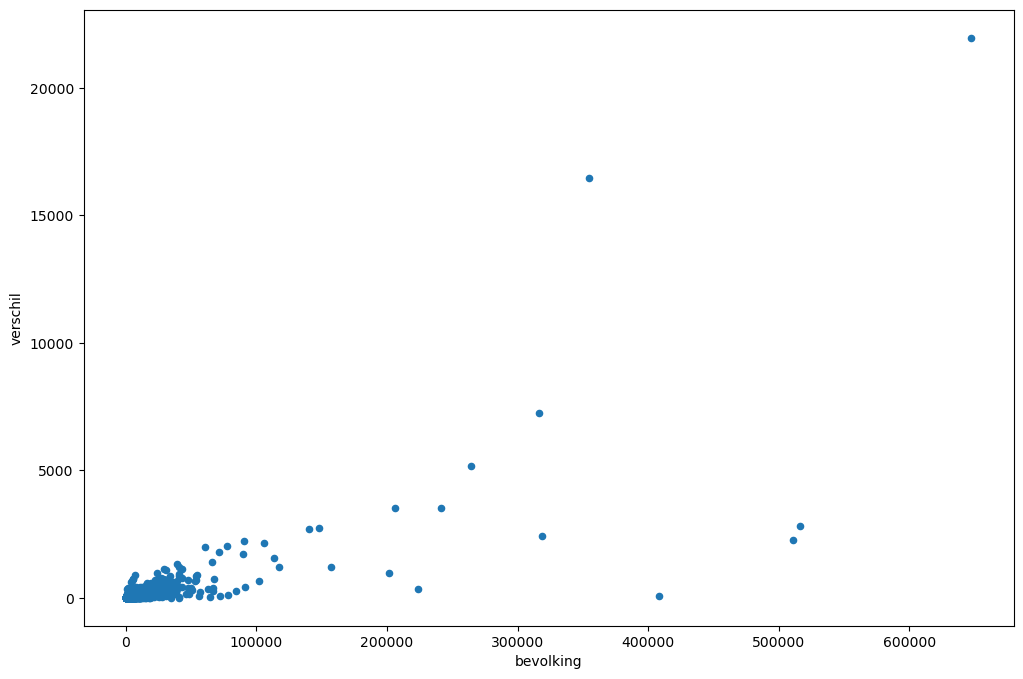

In [488]:
residuals_df.sort_values('verschil', ascending=False).plot(kind='scatter', y='verschil', x='bevolking', figsize=(12,8))

<Axes: xlabel='bevolking', ylabel='verschil_pct'>

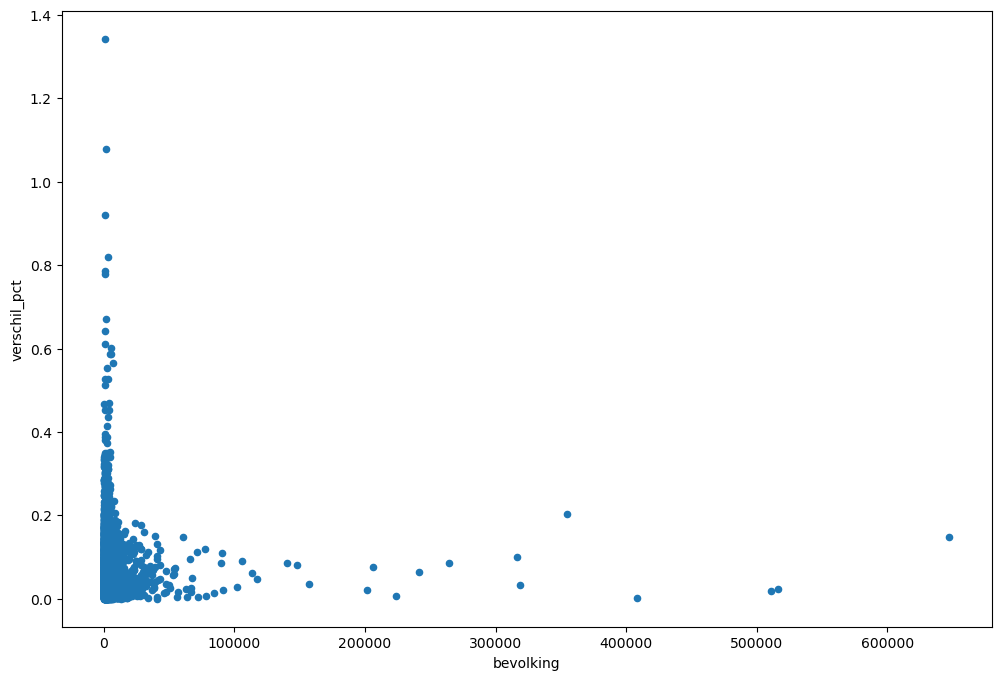

In [489]:
residuals_df.sort_values('verschil', ascending=False).plot(kind='scatter', y='verschil_pct', x='bevolking', figsize=(12,8))


,year_mun_id,year,bevolking,bewoonde_huizen_schepen,bevolking_mannelijk,refpop_source,refpop,refpop_pct_bevolking,refpop_pct_woningen,refpop_pct_bevolking_mannelijk
0,1849_'s-Graveland,1849,1247.0,144.0,560.0,refpop_hh,270,0.216520,1.875000,0.482143
1,1849_'s-Gravendeel,1849,2368.0,312.0,1147.0,refpop_hh,530,0.223818,1.698718,0.462075
2,1849_'s-Gravenhage,1849,72225.0,10438.0,32890.0,refpop_hh,16011,0.221682,1.533915,0.486804
3,1849_'s-Gravenmoer,1849,825.0,113.0,400.0,refpop_hh,175,0.212121,1.548673,0.437500
4,1849_'s-Gravenpolder,1849,667.0,109.0,335.0,refpop_hh,139,0.208396,1.275229,0.414925
...,...,...,...,...,...,...,...,...,...,...
8683,1920_Vlaardingen,1920,25447.0,4232.0,12702.0,refpop_hh,5452,0.214249,1.288280,0.429224
8684,1920_Vlissingen,1920,22511.0,3556.0,11200.0,refpop_hh,5461,0.242593,1.535714,0.487589
8685,1920_Zaandam,1920,28828.0,6986.0,0.0,refpop_hh,7085,0.245768,1.014171,inf
8686,1920_Zaandam,1920,28828.0,6986.0,14517.0,refpop_hh,7085,0.245768,1.014171,0.488048


[]

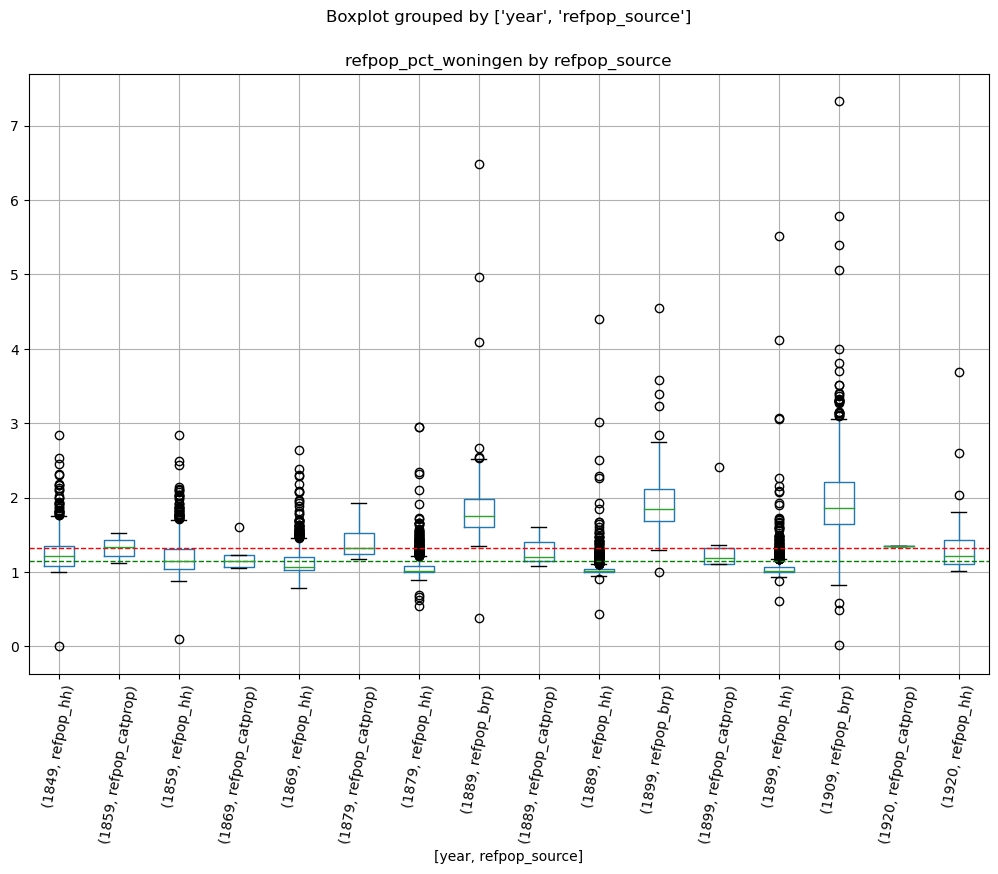

In [235]:
mean_refpop_pct_woningen_catprop =  cbs_large_long.query('refpop_source == "refpop_catprop"').refpop_pct_woningen.mean()
mean_refpop_pct_woningen_hh =  cbs_large_long.query('refpop_source == "refpop_hh"').refpop_pct_woningen.mean()


# plot refpop_pct_bevolking by refpop_source
fig = cbs_large_long.query("refpop_pct_woningen < 10").boxplot(column='refpop_pct_woningen', by=['year', 'refpop_source'], figsize=(12,8), rot=80)
# set title
fig.title.set(text="refpop_pct_woningen by refpop_source")
# set y limit to 0,1
# plt.ylim(0,1)
# add horizontal line at mean_refpop_pct_bevolking_catprop
plt.axhline(mean_refpop_pct_woningen_catprop, color='red', linestyle='dashed', linewidth=1)
# add horzontal line at mean_refpop_pct_bevolking_hh
plt.axhline(mean_refpop_pct_woningen_hh, color='green', linestyle='dashed', linewidth=1)

fig.plot()

[]

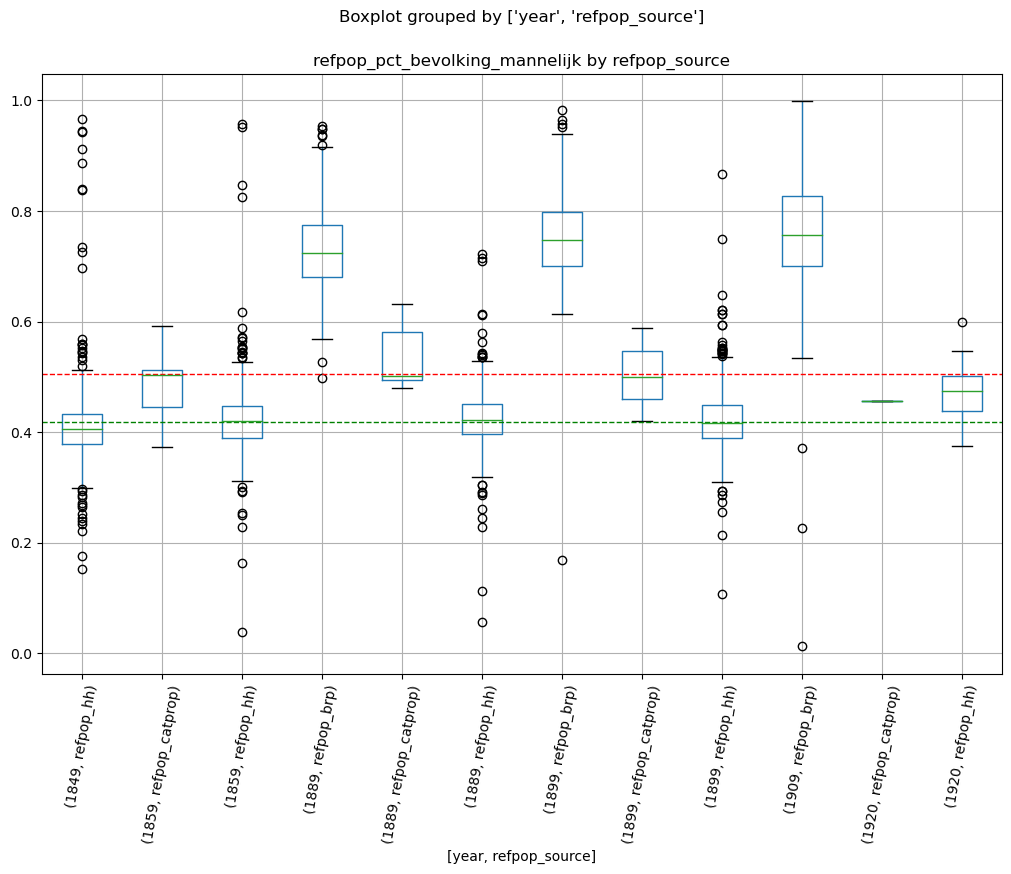

In [239]:
mean_refpop_pct_mannen_catprop =  cbs_large_long.query('refpop_source == "refpop_catprop" & refpop_pct_bevolking_mannelijk < 1').refpop_pct_bevolking_mannelijk.mean()
mean_refpop_pct_mannen_hh =  cbs_large_long.query('refpop_source == "refpop_hh" & refpop_pct_bevolking_mannelijk < 1').refpop_pct_bevolking_mannelijk.mean()


# plot refpop_pct_bevolking by refpop_source
fig = cbs_large_long.query("refpop_pct_bevolking_mannelijk < 1").boxplot(column='refpop_pct_bevolking_mannelijk', by=['year', 'refpop_source'], figsize=(12,8), rot=80)
# set title
fig.title.set(text="refpop_pct_bevolking_mannelijk by refpop_source")
# set y limit to 0,1
# plt.ylim(0,1)
# add horizontal line at mean_refpop_pct_bevolking_catprop
plt.axhline(mean_refpop_pct_mannen_catprop, color='red', linestyle='dashed', linewidth=1)
# add horzontal line at mean_refpop_pct_bevolking_hh
plt.axhline(mean_refpop_pct_mannen_hh, color='green', linestyle='dashed', linewidth=1)

fig.plot()